<a href="https://colab.research.google.com/github/hsantos1985/neural_network/blob/main/APLICA%C3%87%C3%95ES_REDES_NEURAIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Redes neurais
##Aplicações para treinamento
##Dataset - Iris

##IMPORTAÇÃO DAS BIBLIOTECAS

In [2]:
!pip install keras-visualizer

In [3]:
import tensorflow as tf
import keras
from keras.utils import plot_model

from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt



In [4]:
#CRIAÇÃO DE FUNÇÃO PARA PLOTAR AS IMAGENS DAS REDES
from keras_visualizer import visualizer
from PIL import Image
def plot_nn(model, setting={}):
    visualizer(model, view=True, file_name='output', file_format='png', settings=setting)
    img = Image.open('output.png')
    return img

##CRIAÇÃO DA ABT - ANALYTICAL BASE TABLE

In [44]:
iris = datasets.load_iris()

In [45]:
#nome das colunas
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [46]:
#tratamento dos espaços das colunas
nome_colunas=[]
for i in iris.feature_names:
  nome_colunas.append(i.replace(' ','_').replace('(','').replace(')',''))

In [47]:
nome_colunas

['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']

In [48]:
abt=pd.DataFrame(iris.data, columns=nome_colunas)

In [49]:
abt['target']=iris.target

In [50]:
abt.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#SEPARAÇÃO DAS VARIÁVEIS EXPLICATIVAS E TARGET
##TRAIN TEST SPLIT

In [51]:
#filtro da base só com o target =1
abt_filter = abt[abt['target'] !=0 ]

In [52]:
abt_filter.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [23]:
X=abt_filter[['petal_length_cm','sepal_length_cm']]
y=abt_filter['target']

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)

##CRIAÇÃO DOS MODELOS

In [53]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)

X_train_transform = mm_scaler.transform(X_train)
X_test_transform = mm_scaler.transform(X_test)

In [54]:
#criação dos modelos
model=keras.models.Sequential()
model.add(keras.layers.Input(shape=(2,), name='camada_entrada'))
model.add(keras.layers.Dense(1,activation='sigmoid',name='camada_saida'))


In [64]:
historico1 = model.fit(X_train_transform, y_train, validation_data=(X_test_transform, y_test), epochs=100, batch_size=1)

Epoch 1/100
70/70 [==============================] - 0s 4ms/step - loss: -15.5721 - accuracy: 0.5000 - val_loss: -14.6106 - val_accuracy: 0.5000
Epoch 2/100
70/70 [==============================] - 0s 3ms/step - loss: -15.8721 - accuracy: 0.5000 - val_loss: -14.9020 - val_accuracy: 0.5000
Epoch 3/100
70/70 [==============================] - 0s 2ms/step - loss: -16.1721 - accuracy: 0.5000 - val_loss: -15.1930 - val_accuracy: 0.5000
Epoch 4/100
70/70 [==============================] - 0s 2ms/step - loss: -16.4720 - accuracy: 0.5000 - val_loss: -15.4838 - val_accuracy: 0.5000
Epoch 5/100
70/70 [==============================] - 0s 3ms/step - loss: -16.7720 - accuracy: 0.5000 - val_loss: -15.7745 - val_accuracy: 0.5000
Epoch 6/100
70/70 [==============================] - 0s 2ms/step - loss: -17.0719 - accuracy: 0.5000 - val_loss: -16.0650 - val_accuracy: 0.5000
Epoch 7/100
70/70 [==============================] - 0s 3ms/step - loss: -17.3719 - accuracy: 0.5000 - val_loss: -16.3554 - val_ac

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 camada_saida (Dense)        (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=250)

Epoch 1/250
3/3 [==============================] - 1s 99ms/step - loss: 14.9874 - accuracy: 0.0000e+00 - val_loss: 11.2105 - val_accuracy: 0.0000e+00
Epoch 2/250
3/3 [==============================] - 0s 18ms/step - loss: 10.4394 - accuracy: 0.0000e+00 - val_loss: 6.5619 - val_accuracy: 0.0000e+00
Epoch 3/250
3/3 [==============================] - 0s 16ms/step - loss: 5.7753 - accuracy: 0.0000e+00 - val_loss: 2.6835 - val_accuracy: 0.0000e+00
Epoch 4/250
3/3 [==============================] - 0s 17ms/step - loss: 2.0063 - accuracy: 0.0286 - val_loss: -0.0664 - val_accuracy: 0.5000
Epoch 5/250
3/3 [==============================] - 0s 16ms/step - loss: -0.3408 - accuracy: 0.5000 - val_loss: -1.0964 - val_accuracy: 0.5000
Epoch 6/250
3/3 [==============================] - 0s 17ms/step - loss: -1.2846 - accuracy: 0.5000 - val_loss: -1.8392 - val_accuracy: 0.5000
Epoch 7/250
3/3 [==============================] - 0s 16ms/step - loss: -2.0095 - accuracy: 0.5000 - val_loss: -2.4319 - val_acc

In [57]:
model.evaluate(X_train, y_train)

3/3 [==============================] - 0s 4ms/step - loss: -141.4383 - accuracy: 0.5000


[-141.43829345703125, 0.5]

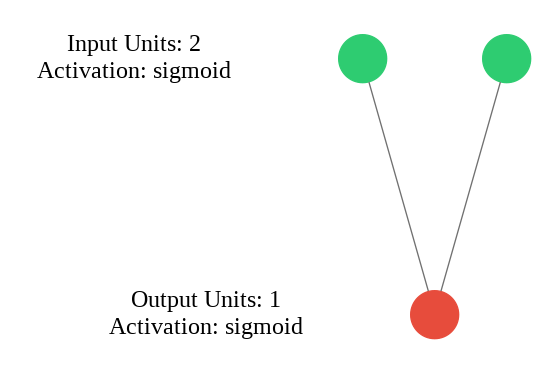

In [58]:
plot_nn(model)

In [59]:
#APLICANDO MAIS CAMADAS AO MODELO
model2 = keras.models.Sequential()
model2.add(keras.layers.Input(shape=(2, ), name='camada_entrada'))
model2.add(keras.layers.Dense(10, activation='sigmoid'))
model2.add(keras.layers.Dense(1, activation='sigmoid', name='camada_saida'))

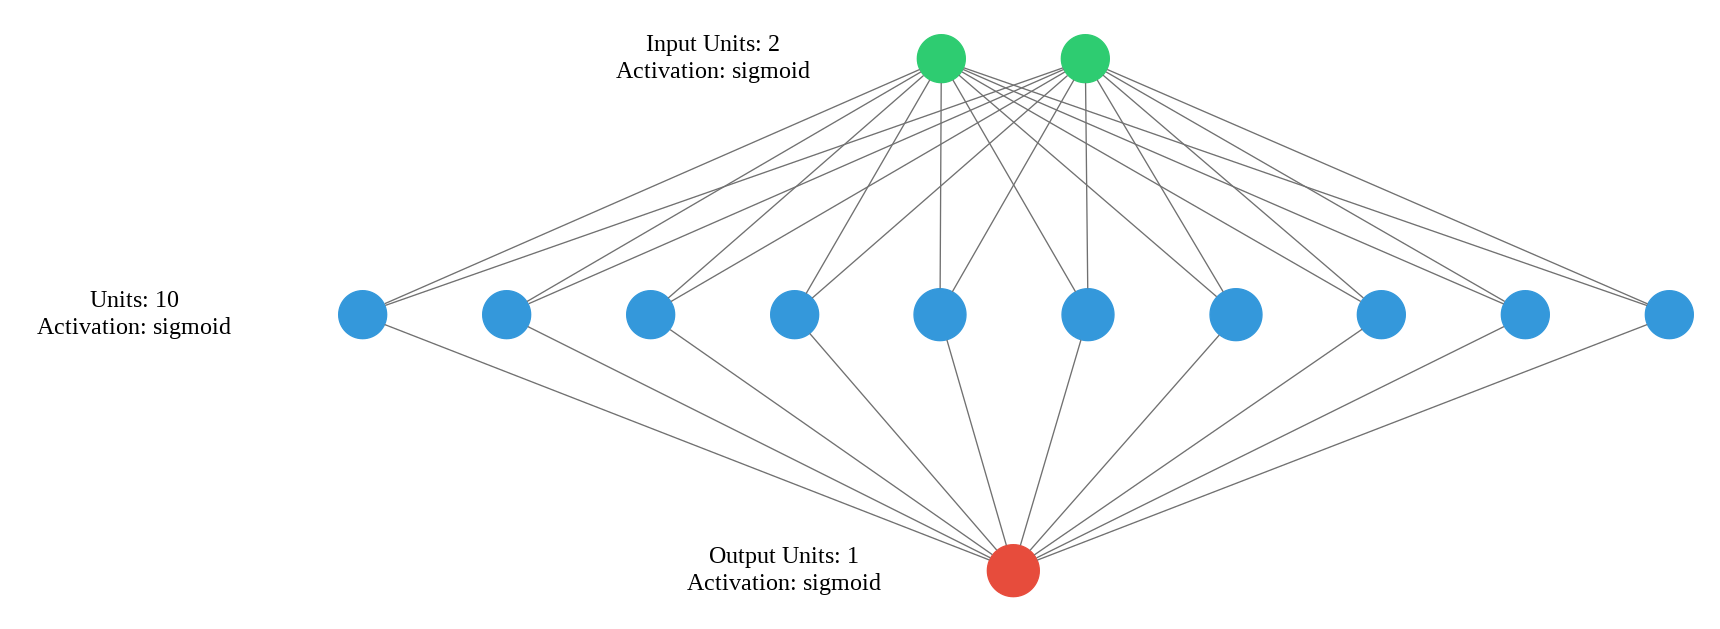

In [60]:
plot_nn(model2)

In [61]:
X_train_transform[:5]

array([[0.47058824, 0.53333333],
       [0.76470588, 0.83333333],
       [0.61764706, 0.6       ],
       [1.        , 0.93333333],
       [0.47058824, 0.3       ]])

In [62]:
#APLICANDO MAISI CAMADAS AO MODELO E OUTRAS FUNÇÕES DE ATIVAÇÃO
model2 = keras.models.Sequential()
model2.add(keras.layers.Input(shape=(2, ), name='camada_entrada'))
model2.add(keras.layers.Dense(10, activation='sigmoid'))
model2.add(keras.layers.Dense(1, activation='sigmoid', name='camada_saida'))

model2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

historico2 = model2.fit(X_train_transform, y_train, validation_data=(X_test_transform, y_test), epochs=500, batch_size=32)

Epoch 1/500
3/3 [==============================] - 2s 92ms/step - loss: -0.0486 - accuracy: 0.5000 - val_loss: -0.0541 - val_accuracy: 0.5000
Epoch 2/500
3/3 [==============================] - 0s 26ms/step - loss: -0.0700 - accuracy: 0.5000 - val_loss: -0.0750 - val_accuracy: 0.5000
Epoch 3/500
3/3 [==============================] - 0s 17ms/step - loss: -0.0914 - accuracy: 0.5000 - val_loss: -0.0958 - val_accuracy: 0.5000
Epoch 4/500
3/3 [==============================] - 0s 17ms/step - loss: -0.1125 - accuracy: 0.5000 - val_loss: -0.1168 - val_accuracy: 0.5000
Epoch 5/500
3/3 [==============================] - 0s 19ms/step - loss: -0.1336 - accuracy: 0.5000 - val_loss: -0.1377 - val_accuracy: 0.5000
Epoch 6/500
3/3 [==============================] - 0s 17ms/step - loss: -0.1545 - accuracy: 0.5000 - val_loss: -0.1584 - val_accuracy: 0.5000
Epoch 7/500
3/3 [==============================] - 0s 28ms/step - loss: -0.1761 - accuracy: 0.5000 - val_loss: -0.1790 - val_accuracy: 0.5000
Epoch 

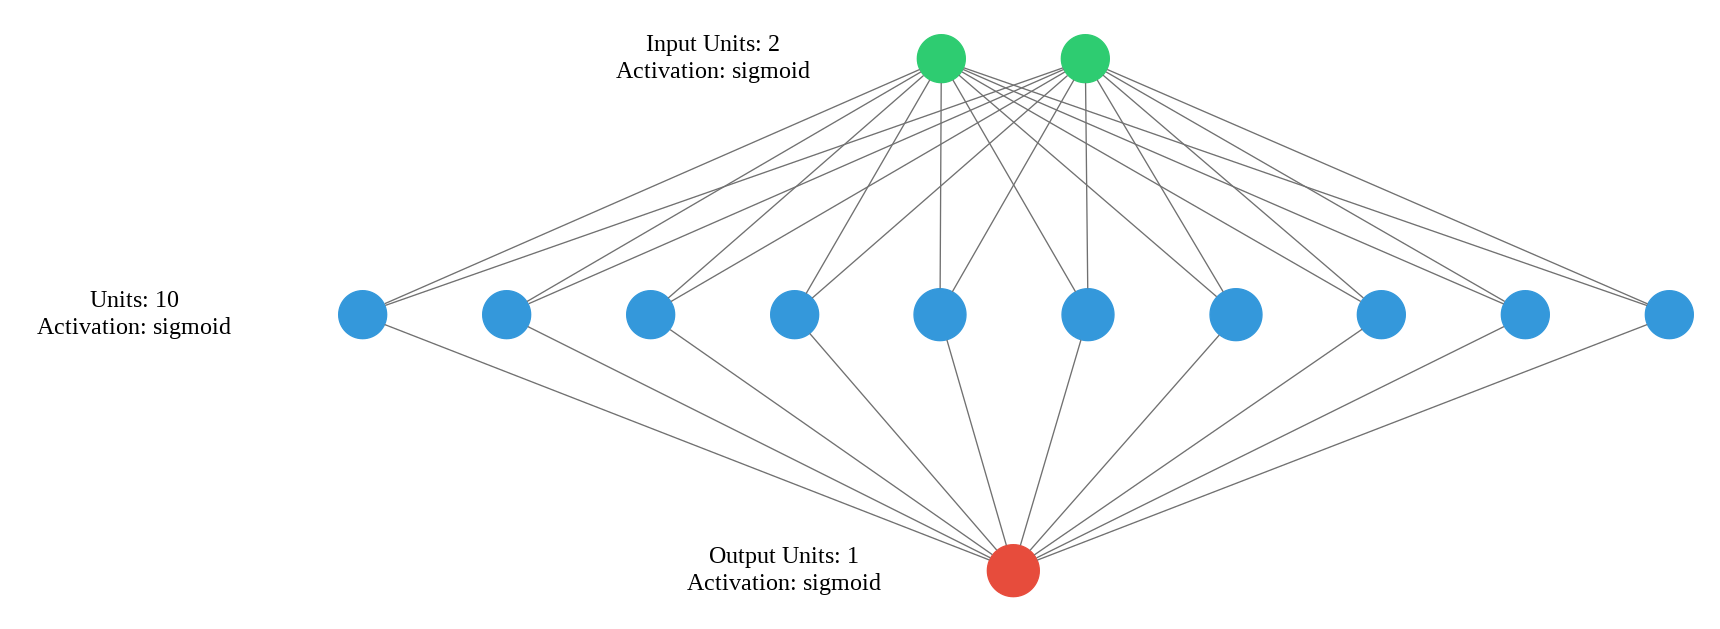

In [38]:
plot_nn(model2)

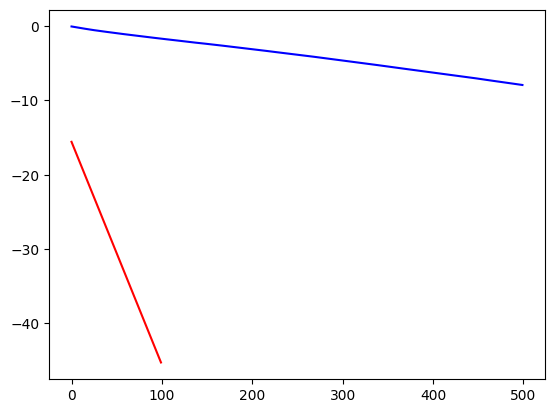

In [66]:
#comprarando as perdas entre 2 modelos
import matplotlib.pyplot as plt
plt.plot(historico1.history['loss'], 'r')
plt.plot(historico2.history['loss'], 'b')